In [ ]:
# comments are mine

In [ ]:
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 36.3 MB/s eta 0:00:00


In [ ]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bcrabl_ic50.csv')

In [ ]:
df

,id,mw,logp,smiles,ic50,unit,canonical,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL3929105,581.37,2.51,O=[N+]([O-])c1cc(C(F)(F)F)ccc1S(=O)(=O)N1CCN(c...,0.000021,nM,O=[N+]([O-])c1cc(C(F)(F)F)ccc1S(=O)(=O)N1CCN(c...,14.079246,-6.784948,14.079246,0.483120,0.387450,581.371,561.211,580.035136,190,0,0.416162,-0.377774,0.416162,0.377774,1.142857,1.800000,2.400000,12.995510,-0.180628,1.939150e-16,-2.714907,4.192000e-01,-2.867661,2.463725,-1.005683,2.093917,2058.736099,43.204224,36.144629,18.547122,24.146295,18.406246,10.639307,5.872870,8.389398,3.735607,5.742176,2.262364,3.671498,-2.56,4.872206e+10,10.432766,9.829594,5.339189,234.470972,14.536682,5.817863,4.895483,15.971630,5.687386,6.176299,10.114318,13.401776,22.460440,0.0,0.000000,28.014781,56.679506,50.009589,58.664387,43.406823,0.0000,14.273173,0.0,11.071782,61.898948,44.450641,0,0.000000,9.799819,30.624833,0.000000,15.929944,79.713410,20.936453,10.114318,32.978623,33.668354,0.000000,0.000000,0,122.01,144.012459,31.703360,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,30.634764,27.415171,235.867903,2.642833,13.294811,11.930448,-4.977104,-3.194636,-6.856178,-7.138795,-33.701002,-6.784948,0.473684,35,0,11,0,2,2,1,1,2,9,0,16,5,0,2,2,4,2.51360,121.8342,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,CHEMBL3973189,500.32,3.06,O=C(c1ccc(C(F)(F)F)cc1)N1CCN(c2nc(N3CCOCC3)ncc...,0.000024,nM,O=C(c1ccc(C(F)(F)F)cc1)N1CCN(c2nc(N3CCOCC3)ncc...,13.771746,-5.516138,13.771746,0.404041,0.646224,50

# Feature engineering

## Canonical SMILES generation

In [ ]:
def canonical_smiles(smiles):
   mols = [Chem.MolFromSmiles(smi) for smi in smiles]
   canonical_smiles = [Chem.MolToSmiles(mol) for mol in mols]
   return canonical_smiles

df['canonical'] = canonical_smiles(df['smiles'])

In [ ]:
len(df['canonical'])

856

In [ ]:
df

,id,mw,logp,smiles,ic50,unit,lebei,lele,lelle,lesei,canonical
0,CHEMBL3929105,581.37,2.51,O=[N+]([O-])c1cc(C(F)(F)F)ccc1S(=O)(=O)N1CCN(c...,0.000021,ug.mL-1,NaN,NaN,NaN,NaN,O=[N+]([O-])c1cc(C(F)(F)F)ccc1S(=O)(=O)N1CCN(c...
1,CHEMBL3973189,500.32,3.06,O=C(c1ccc(C(F)(F)F)cc1)N1CCN(c2nc(N3CCOCC3)ncc...,0.000024,ug.mL-1,NaN,NaN,NaN,NaN,O=C(c1ccc(C(F)(F)F)cc1)N1CCN(c2nc(N3CCOCC3)ncc...
2,CHEMBL3953682,530.71,3.33,O=[N+]([O-])c1cc(C(F)(F)F)ccc1S(=O)(=O)N1CCN(c...,0.000023,ug.mL-1,NaN,NaN,NaN,NaN,O=[N+]([O-])c1cc(C(F)(F)F)ccc1S(=O)(=O)N1CCN(c...
3,CHEMBL1421,488.02,3.31,Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(C...,1.000000,nM,NaN,NaN,NaN,NaN,Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(C...
4,CHEMBL2375973,512.61,5.26,CCN(CC)CCOc1ccc(NC(=O)c2ccc(OC)c(Nc3nccc(-c4cc...,1.480000,nM,17.23,0.32,3.57,8.7,CCN(CC)CCOc1ccc(NC(=O)c2ccc(OC)c(Nc3nccc(-c4cc...
...,...,...,...,...,...,...,...,...,...,...,...
851,CHEMBL3357282,560.43,5.39,O=C(c1ccc(-c2cc(Nc3ccc(Br)cc3)ncn2)cc1)N1CCN(C...,NaN,NaN,NaN,NaN,NaN,NaN,O=C(c1ccc(-c2cc(Nc3ccc(Br)cc3)ncn2)cc1)N1CCN(C...
852,CHEMBL3357288,495.56,4.93,Cc1ccc(Nc2cc(-c3ccc(C(=O)N4CCN(C(=O)c5ccccc5F)...,NaN,NaN,NaN,NaN,NaN,NaN,Cc1ccc(Nc2cc(-c3ccc(C(=O)N4CCN(C(=O)c5ccccc5F)...
853,CHEMBL3618126,485.52,4.19,COc1ccc(Nc2cc(-c3ccc(C(=O)NCCNC(=O)c4ccc(F)cc4...,NaN,NaN,NaN,NaN,NaN,NaN,COc1ccc(Nc2cc(-c3ccc(C(=O)NCCNC(=O)c4ccc(F)cc4...
854,CHEMBL4743300,412.43,4.28,Cc1ccc(NC(=O)c2cccc(F)c2)cc1-n1cc(-c2cnc3cccnn...,NaN,NaN,NaN,NaN,NaN,NaN,Cc1ccc(NC(=O)c2cccc(F)c2)cc1-n1cc(-c2cnc3cccnn...


## Duplicate handling

In [ ]:
#calculate duplicates

duplicate = df[df['canonical'].duplicated()]['canonical'].values
len(duplicate)

233

In [ ]:
# see/list duplicates

df[df['canonical'].isin(duplicate)].sort_values(by='canonical')

,id,mw,logp,smiles,ic50,unit,lebei,lele,lelle,lesei,canonical
697,CHEMBL5172694,505.89,3.68,C=CC(=O)Nc1ccc(-c2cn([C@@H]3CN[C@H](C(=O)Nc4cc...,139.64,nM,13.55,0.27,3.17,6.02,C=CC(=O)Nc1ccc(-c2cn([C@@H]3CN[C@H](C(=O)Nc4cc...
776,CHEMBL5172694,505.89,3.68,C=CC(=O)Nc1ccc(-c2cn([C@@H]3CN[C@H](C(=O)Nc4cc...,9.26,nM,15.88,0.31,4.35,7.06,C=CC(=O)Nc1ccc(-c2cn([C@@H]3CN[C@H](C(=O)Nc4cc...
786,CHEMBL109480,585.70,2.54,C=CCNC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C...,5000.00,nM,9.05,0.17,2.76,3.19,C=CCNC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C...
785,CHEMBL109480,585.70,2.54,C=CCNC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C...,1000.00,nM,10.24,0.20,3.46,3.61,C=CCNC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C...
737,CHEMBL5094517,504.90,5.14,CC(=O)Nc1ccc(-c2ccc(C(=O)N[C@@H](C)C(=O)Nc3ccc...,22450.00,nM,9.21,0.18,-0.49,4.64,CC(=O)Nc1ccc(-c2ccc(C(=O)N[C@@H](C)C(=O)Nc3ccc...
...,...,...,...,...,...,...,...,...,...,...,...
330,CHEMBL1242482,516.34,6.35,O=C(O)c1ccc(C(=O)/C(=C\c2ccc(F)c([N+](=O)[O-])...,500.00,nM,12.20,0.27,-0.05,6.46,O=C(O)c1ccc(C(=O)/C(=C\c2ccc(F)c([N+](=O)[O-])...
537,CHEMBL3357281,499.52,4.76,O=C(c1ccc(-c2cc(Nc3cccc(F)c3)ncn2)cc1)N1CCN(C(...,17.00,nM,15.55,0.29,3.01,9.91,O=C(c1ccc(-c2cc(Nc3cccc(F)c3)ncn2)cc1)N1CCN(C(...
287,CHEMBL3357281,499.52,4.76,O=C(c1ccc(-c2cc(Nc3cccc(F)c3)ncn2)cc1)N1CCN(C(...,17.00,nM,15.55,0.29,3.01,9.91,O=C(c1ccc(-c2cc(Nc3cccc(F)c3)ncn2)cc1)N1CCN(C(...
252,CHEMBL2386595,496.63,4.59,[2H]C([2H])([2H])N1CCN(Cc2ccc(C(=O)Nc3ccc(C)c(...,436.00,nM,12.89,0.23,1.77,7.37,[2H]C([2H])([2H])N1CCN(Cc2ccc(C(=O)Nc3ccc(C)c(...


In [ ]:
#drop duplicates

df = df.drop_duplicates(subset='canonical')
df

,id,mw,logp,smiles,ic50,unit,lebei,lele,lelle,lesei,canonical
0,CHEMBL3929105,581.37,2.51,O=[N+]([O-])c1cc(C(F)(F)F)ccc1S(=O)(=O)N1CCN(c...,0.000021,ug.mL-1,NaN,NaN,NaN,NaN,O=[N+]([O-])c1cc(C(F)(F)F)ccc1S(=O)(=O)N1CCN(c...
1,CHEMBL3973189,500.32,3.06,O=C(c1ccc(C(F)(F)F)cc1)N1CCN(c2nc(N3CCOCC3)ncc...,0.000024,ug.mL-1,NaN,NaN,NaN,NaN,O=C(c1ccc(C(F)(F)F)cc1)N1CCN(c2nc(N3CCOCC3)ncc...
2,CHEMBL3953682,530.71,3.33,O=[N+]([O-])c1cc(C(F)(F)F)ccc1S(=O)(=O)N1CCN(c...,0.000023,ug.mL-1,NaN,NaN,NaN,NaN,O=[N+]([O-])c1cc(C(F)(F)F)ccc1S(=O)(=O)N1CCN(c...
3,CHEMBL1421,488.02,3.31,Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(C...,1.000000,nM,NaN,NaN,NaN,NaN,Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(C...
4,CHEMBL2375973,512.61,5.26,CCN(CC)CCOc1ccc(NC(=O)c2ccc(OC)c(Nc3nccc(-c4cc...,1.480000,nM,17.23,0.32,3.57,8.7,CCN(CC)CCOc1ccc(NC(=O)c2ccc(OC)c(Nc3nccc(-c4cc...
...,...,...,...,...,...,...,...,...,...,...,...
851,CHEMBL3357282,560.43,5.39,O=C(c1ccc(-c2cc(Nc3ccc(Br)cc3)ncn2)cc1)N1CCN(C...,NaN,NaN,NaN,NaN,NaN,NaN,O=C(c1ccc(-c2cc(Nc3ccc(Br)cc3)ncn2)cc1)N1CCN(C...
852,CHEMBL3357288,495.56,4.93,Cc1ccc(Nc2cc(-c3ccc(C(=O)N4CCN(C(=O)c5ccccc5F)...,NaN,NaN,NaN,NaN,NaN,NaN,Cc1ccc(Nc2cc(-c3ccc(C(=O)N4CCN(C(=O)c5ccccc5F)...
853,CHEMBL3618126,485.52,4.19,COc1ccc(Nc2cc(-c3ccc(C(=O)NCCNC(=O)c4ccc(F)cc4...,NaN,NaN,NaN,NaN,NaN,NaN,COc1ccc(Nc2cc(-c3ccc(C(=O)NCCNC(=O)c4ccc(F)cc4...
854,CHEMBL4743300,412.43,4.28,Cc1ccc(NC(=O)c2cccc(F)c2)cc1-n1cc(-c2cnc3cccnn...,NaN,NaN,NaN,NaN,NaN,NaN,Cc1ccc(NC(=O)c2cccc(F)c2)cc1-n1cc(-c2cnc3cccnn...


## Descriptor calculation (RDKit)

In [ ]:
#define function

def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names

In [ ]:
#function calling

Mol_descriptors,desc_names = RDkit_descriptors(df['canonical'])

In [ ]:
descriptor_200 = pd.DataFrame(Mol_descriptors,columns=desc_names)

In [ ]:
descriptor_200

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.079246,-6.784948,14.079246,0.483120,0.387450,581.371,561.211,580.035136,190,0,0.416162,-0.377774,0.416162,0.377774,1.142857,1.800000,2.400000,12.995510,-0.180628,1.939154e-16,-2.714907,4.192000e-01,-2.867661,2.463725,-1.005683,2.093917,2058.736099,43.204224,36.144629,18.547122,24.146295,18.406246,10.639307,5.872870,8.389398,3.735607,5.742176,2.262364,3.671498,-2.56,4.872206e+10,10.432766,9.829594,5.339189,234.470972,14.536682,5.817863,4.895483,15.971630,5.687386,6.176299,10.114318,13.401776,22.460440,0.0,0.000000,28.014781,56.679506,50.009589,58.664387,43.406823,0.0000,14.273173,0.0,11.071782,61.898948,44.450641,0.0,0.000000,9.799819,30.624833,0.000000,15.929944,79.713410,20.936453,10.114318,32.978623,33.668354,0.000000,0.000000,0.0,122.01,144.012459,31.703360,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,30.634764,27.415171,235.867903,2.642833,13.294811,11.930448,-4.977104,-3.194636,-6.856178,-7.138795,-33.701002,-6.784948,0.473684,35,0,11,0,2,2,1,1,2,9,0,16,5,0,2,2,4,2.51360,121.8342,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,13.771746,-5.516138,13.771746,0.404041,0.646224,500.319,479.151,499.083072,166,0,0.415910,-0.377774,0.415910,0.377774,1.064516,1.709677,2.322581,11.415335,-0.180632,1.299981e-16,-2.725223,8.471608e-02,-2.869525,1.966588,-1.005683,2.015918,1779.087847,40.704224,35.564422,16.150419,22.902278,18.275190,8.568188,5.309148,6.102146,3.357684,3.889643,1.99

In [ ]:
descriptor_200.to_excel('/content/drive/MyDrive/descriptor_200.xlsx', index=False)

In [ ]:
df.to_excel('/content/drive/MyDrive/bcrabl_ic50_cleaned.xlsx', index=False)

## Train-test split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/PROJECT_4/DATASET/5_bcrabl_ic50_cleaned.csv')

print(df.head())
print(df.info())
print(df.describe())

              id      mw  logp  \
0  CHEMBL3929105  581.37  2.51   
1  CHEMBL3973189  500.32  3.06   
2  CHEMBL3953682  530.71  3.33   
3     CHEMBL1421  488.02  3.31   
4  CHEMBL2375973  512.61  5.26   

                                              smiles      ic50 unit  \
0  O=[N+]([O-])c1cc(C(F)(F)F)ccc1S(=O)(=O)N1CCN(c...  0.000021   nM   
1  O=C(c1ccc(C(F)(F)F)cc1)N1CCN(c2nc(N3CCOCC3)ncc...  0.000024   nM   
2  O=[N+]([O-])c1cc(C(F)(F)F)ccc1S(=O)(=O)N1CCN(c...  0.000023   nM   
3  Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(C...  1.000000   nM   
4  CCN(CC)CCOc1ccc(NC(=O)c2ccc(OC)c(Nc3nccc(-c4cc...  1.480000   nM   

                                           canonical  MaxEStateIndex  \
0  O=[N+]([O-])c1cc(C(F)(F)F)ccc1S(=O)(=O)N1CCN(c...       14.079246   
1  O=C(c1ccc(C(F)(F)F)cc1)N1CCN(c2nc(N3CCOCC3)ncc...       13.771746   
2  O=[N+]([O-])c1cc(C(F)(F)F)ccc1S(=O)(=O)N1CCN(c...       13.759629   
3  Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(C...       13.560621   
4  CCN(C

In [ ]:
X = df.drop(columns=['ic50', 'id', 'smiles', 'unit', 'canonical'])
y = df['ic50']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training data shape: (476, 210)
Testing data shape: (120, 210)
Training labels shape: (476,)
Testing labels shape: (120,)


## Scaling

In [ ]:
# Rio: should we check outliers before scaling?

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train) # fit and transform the training dataset
X_test_scaled = scaler.transform(X_test) # only transform the test set

In [ ]:
print(f"Transformed Training data shape: {X_train.shape}")
print(f"Transformed Testing data shape: {X_test.shape}")

Transformed Training data shape: (476, 210)
Transformed Testing data shape: (120, 210)


## Feature analysis: Clustering

In [ ]:
from sklearn.cluster import DBSCAN

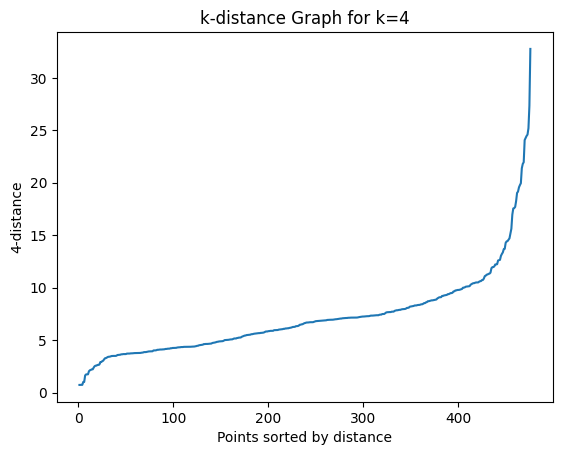

In [ ]:
# k-distance graph to find a proper 'eps' for DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

k = 4

neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X_train_scaled)
distances, indices = nbrs.kneighbors(X_train_scaled)

k_distances = np.sort(distances[:, k-1])

plt.plot(range(1, len(k_distances) + 1), k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}-distance')
plt.title(f'k-distance Graph for k={k}')
plt.show()

In [ ]:
# Apply DBSCAN --> elbow as eps = 10
dbscan = DBSCAN(eps=10, min_samples=5)
clusters = dbscan.fit_predict(X_train_scaled)

unique_labels = set(clusters)
n_clusters = len(unique_labels) - (1 if -1 in clusters else 0)
n_noise_points = list(clusters).count(-1)
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise_points}")

Number of clusters: 5
Number of noise points: 57


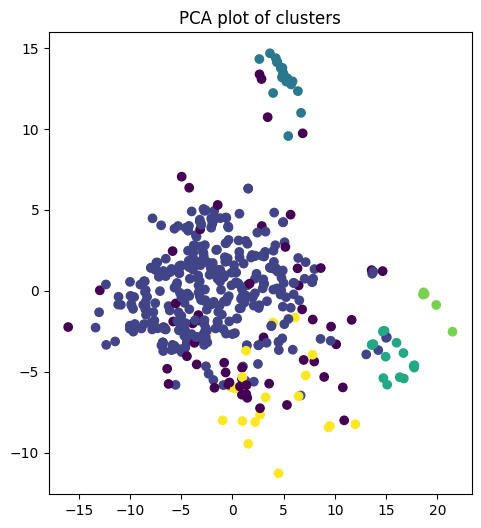

In [ ]:
# Visualization of clusters
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2) # reduce to PCA for easier visualization
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.title('PCA plot of clusters')

plt.show()

## Training 1: Best Model Determination

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.model_selection import train_test_split

# Separate noise and non-noise data
is_noise = (clusters == -1)
X_noise = X_train_scaled[is_noise]

#noise is being left alone for now

In [ ]:
### Linear Regression ### --> Baseline Model

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train_scaled, y_train)

from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2_lr= r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"LR R^2 Score: {r2_rf:.2f}")

Mean Squared Error: 559114966924419652361650176.00
LR R^2 Score: -0.09


In [ ]:
### Random Forest ###
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"RF R^2 Score: {r2_rf:.2f}")

Mean Squared Error: 11250507333.59
RF R^2 Score: -2.06


In [ ]:
### SVM-R (SVR) ###
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR())
])

svm_pipeline.fit(X_train_scaled, y_train)

y_pred_svm = svm_pipeline.predict(X_test_scaled)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print(f"SVM Mean Squared Error: {mse_svm:.2f}")
print(f"SVM R^2 Score: {r2_svm:.2f}")

SVM Mean Squared Error: 4023167242.53
SVM R^2 Score: -0.09


In [ ]:
### XGBoost ###
import xgboost as xgb
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Params
params = {
    'objective': 'reg:squarederror', # Regression with squared loss
    'max_depth': 6,                  # Maximum depth of a tree
    'eta': 0.3,                      # Learning rate
    'subsample': 0.8,                # Subsample ratio of the training instances
    'colsample_bytree': 0.8,         # Subsample ratio of columns when constructing each tree
    'seed': 42                       # Random seed for reproducibility
}

bst = xgb.train(params, dtrain, num_boost_round=100)

y_pred_xgb = bst.predict(dtest)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGB R^2 Score: {r2_xgb:.2f}")
print(f"XGBoost Mean Squared Error: {mse_xgb:.2f}")

XGB R^2 Score: -11.99
XGBoost Mean Squared Error: 47775799600.63


In [ ]:
### MLP ###

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42))
])

In [ ]:
# Train
mlp_pipeline.fit(X_train_scaled, y_train)

y_pred_mlp = mlp_pipeline.predict(X_test_scaled)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
print(f"MLP Mean Squared Error: {mse_mlp:.2f}")
print(f"MLP R^2 Score: {r2_mlp:.2f}")

MLP Mean Squared Error: 5330542890.14
MLP R^2 Score: -0.45


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Conclusion: SVM and MLP is slightly better than the rest

## RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression() # can be experimented upon

rfe = RFE(estimator=estimator, n_features_to_select=50)  # 'n' can be experimented upon

In [ ]:
rfe.fit(X_train, y_train)

print("Selected Features: %s" % list(X_train.columns[rfe.support_]))
print("Feature Ranking: %s" % list(rfe.ranking_))

Selected Features: ['NumValenceElectrons', 'Chi0n', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA8', 'EState_VSA9', 'HeavyAtomCount', 'NumHDonors', 'NumHeteroatoms', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_halogen', 'fr_nitrile']
Feature Ranking: [66, 65, 49, 90, 50, 94, 83, 16, 27, 17, 1, 138, 45, 43, 46, 44, 69, 67, 68, 113, 92, 109, 99, 88, 116, 118, 85, 111, 123, 51, 1, 25, 77, 18, 14, 75, 74, 80, 79, 81, 82, 112, 124, 120, 106, 107, 13, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 147, 1, 1, 1,

## New DataFrame

In [ ]:
selected_features = X_train.columns[rfe.support_]
X_train_final = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_final = pd.DataFrame(X_test_scaled, columns=selected_features)

In [ ]:
print("First few rows of the Transformed and Scaled Training set:\n", X_train_final.head())
print("First few rows of the Transformed and Scaled Testing set:\n", X_test_final.head())

First few rows of the Transformed and Scaled Training set:
    NumValenceElectrons     Chi0n  PEOE_VSA1  PEOE_VSA10  PEOE_VSA11  \
0            -0.709204 -1.188390  -0.596082   -1.045510    1.267293   
1            -0.970339 -0.680108  -0.819652   -0.244998   -1.110783   
2             0.270049  0.568863   1.942622    0.536879    0.974454   
3            -0.317503  0.592714   0.086423    0.648271   -0.817944   
4             0.139482 -0.162644  -1.561443    1.594679    0.646212   

   PEOE_VSA12  PEOE_VSA13  PEOE_VSA14  PEOE_VSA2  PEOE_VSA3  ...  EState_VSA8  \
0   -0.805413    0.058171    0.724013  -0.075365  -1.463325  ...     0.247095   
1   -0.805413    1.512595   -0.971368   0.804471  -0.685194  ...    -1.256496   
2   -0.805413    1.512595   -0.971368   0.824695  -1.463325  ...    -0.050608   
3    0.447662   -1.396253   -0.971368   0.824252  -1.463325  ...    -0.660765   
4   -0.805413   -1.396253    0.724013  -0.995648   1.133112  ...     2.127523   

   EState_VSA9  HeavyAtomC

## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # can be changed

In [ ]:
X_train_pca = pca.fit_transform(X_train_scaled)
print(f'Number of components selected: {pca.n_components_}') # inspect number of components

Number of components selected: 43


In [ ]:
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Explained Variance: {pca.explained_variance_ratio_.sum()}")

Explained Variance Ratio: [0.20994579 0.10935928 0.09780272 0.08050155 0.06696448 0.05871687
 0.04586245 0.03860792 0.03555938 0.03088196 0.0274602  0.02255915
 0.02037186 0.01739544 0.01613524 0.01570296 0.01388227 0.01267711
 0.01125673 0.01014167 0.00882258]
Total Explained Variance: 0.9506076158898933


## New DataFrame

In [ ]:
import pandas as pd

X_train_pca_df = pd.DataFrame(X_train_pca)  # Create DataFrame from the PCA-transformed training set
X_test_pca_df = pd.DataFrame(X_test_pca)    # Create DataFrame from the PCA-transformed testing set

# Add column names
n_components = X_train_pca.shape[1]
X_train_pca_df.columns = [f'PC{i+1}' for i in range(n_components)]
X_test_pca_df.columns = [f'PC{i+1}' for i in range(n_components)]

X_train_pca_df['ic50'] = y_train.reset_index(drop=True)
X_test_pca_df['ic50'] = y_test.reset_index(drop=True)

In [ ]:
X_train_pca_df.to_csv('X_train_pca.csv', index=False)
X_test_pca_df.to_csv('X_test_pca.csv', index=False)

In [ ]:
from google.colab import files
files.download('X_train_pca.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('X_test_pca.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Training 2: Final Model

In [ ]:
### SVM-R (SVR) - Training 2 ###
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

svm_pipeline = Pipeline([
    ('svm', SVR())
])

svm_pipeline.fit(X_train_pca, y_train)

y_pred_svm = svm_pipeline.predict(X_test_pca)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print(f"SVM Mean Squared Error: {mse_svm:.2f}")
print(f"SVM R^2 Score: {r2_svm:.2f}")

SVM Mean Squared Error: 4023067842.24
SVM R^2 Score: -0.09


In [ ]:
### MLP - Training 2 ###

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42))
])

# Train
mlp_pipeline.fit(X_train_pca, y_train)

y_pred_mlp = mlp_pipeline.predict(X_test_pca)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
print(f"MLP Mean Squared Error: {mse_mlp:.2f}")
print(f"MLP R^2 Score: {r2_mlp:.2f}")

MLP Mean Squared Error: 4827170921.07
MLP R^2 Score: -0.31


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Save Model

In [ ]:
# Save Model Pipeline --> MLP

from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from google.colab import files

# Canonical SMILES generation
def canonical_smiles(smiles):
   mols = [Chem.MolFromSmiles(smi) for smi in smiles]
   canonical_smiles = [Chem.MolToSmiles(mol) for mol in mols]
   return canonical_smiles

df['canonical'] = canonical_smiles(df['smiles'])

# Descriptor calculation
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names

Mol_descriptors,desc_names = RDkit_descriptors(df['canonical'])

mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42))
])

mlp_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_mlp = mlp_pipeline.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
print(f"MLP Mean Squared Error: {mse_mlp:.2f}")
print(f"MLP R^2 Score: {r2_mlp:.2f}")

# Save the model to a file
joblib.dump(mlp_pipeline, 'project4.pkl')

# Download the model file
files.download('project4.pkl')


MLP Mean Squared Error: 5330542890.14
MLP R^2 Score: -0.45


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>